<a href="https://colab.research.google.com/github/sofiagil-12/Sofia/blob/master/Copia_de_ProyectoApp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduccion
### Proyecto de Grado, UV

#### Veronica Sanz (University of Sussex and Valencia )


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Make sure you have conda and jupyter installed

In [0]:
import sys
!{sys.executable} -m conda install tensorflow matplotlib ipykernel scikit-learn pandas numpy==1.16.4 --yes


/usr/bin/python3: No module named conda


In [0]:
from matplotlib import pyplot as plt #llamar a pyplot como plt. Es una libreria para dibujar
import numpy as np #libreria
import pandas as pd #libreria con muchas funciones muy variadas
import tensorflow as tf #libreria, estructura basica de construir redes neuronales, tensorflow light
# bigger fonts
plt.rcParams['font.size'] = 18

In [0]:
# check that we have the devices we expect available, comprueba si tenemos gpu(no tenemos)
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 3650434449710096993, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12630337466330907249
 physical_device_desc: "device: XLA_CPU device"]

### Import keras bits and pieces from tensorflow

In [0]:
# if you have a recent version of tensorflow, keras is included
from tensorflow import keras #keras es muy util y esta dentro de tensorflow
from tensorflow.keras.datasets import mnist #mnist es una base de datos muy grande que esta incluida en tensorflow
from tensorflow.keras.models import Sequential #sequential es una funcion de mnist para crear una red neuronal
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten #tipos de capas que le puedes poner a la red neuronal
from tensorflow.keras.optimizers import RMSprop #optimizer es el objetivo de la red neuronal, lo que realmente quieres que haga bien

### Standard dataset: MNIST handwritten digits

![MNIST](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png "MNIST")



In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_valtest, y_valtest) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# demo the effect of noisy data
#x_train = (x_train/5 + np.random.poisson(200, size=x_train.shape)).clip(0, 255)
#x_valtest = (x_valtest/5 + np.random.poisson(200, size=x_valtest.shape)).clip(0, 255)

In [0]:
# if we wanted to test our model on limited data,
# we could reduce the amount of training data like this...
#idx = np.random.choice(len(x_train), size=len(x_train)//100)
#x_train = x_train[idx]
#y_train = y_train[idx]

### Usually, one splits the data between training, test and validation

#### Training Dataset: 80%
The sample of data used to fit the model
#### Validation Dataset: 10%
The sample of data used to provide an unbiased evaluation of a model fit, we use this data to fine-tune the model hyperparameters 
#### Test Dataset: 10%
The sample of data used to provide an unbiased evaluation of a final model fit 


So it is useful to learn how to split the data (using sklearn)

![split](https://miro.medium.com/max/1552/1*Nv2NNALuokZEcV6hYEHdGA.png "split")

In [0]:
from sklearn.model_selection import train_test_split #decides que datos son train, validation o test
x_test, x_val, y_test, y_val = train_test_split(x_valtest, y_valtest, test_size=0.5)

In [0]:
x_train.shape, y_train.shape #train 60000 datos

((60000, 28, 28), (60000,))

In [0]:
x_test.shape, y_test.shape #test 5000 datos

((5000, 28, 28), (5000,))

In [0]:
x_val.shape, y_val.shape #validation 5000 datos

((5000, 28, 28), (5000,))

### Take a look at the data

You should always carefully examine any new dataset
This dataset is already curated, but in real-life situations you will spend **a lot of time** trimming and preparing the data

class = 7


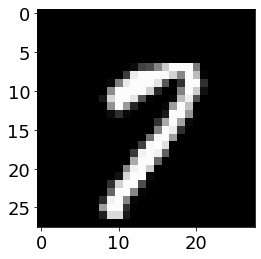

In [0]:
i = 9999
plt.imshow(x_train[i], cmap='gray')
print('class =', y_train[i]) #te enseña la imagen 3 de tu base de datos

class = 8


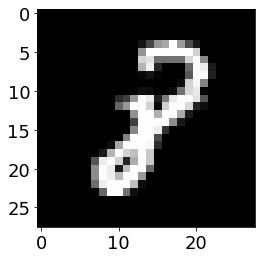

In [0]:
i = 4139
plt.imshow(x_train[i], cmap='gray')
print('class =', y_train[i]) #te enseña la imagen 4139 de tu base de datos

### Prepare the data

Remember the y variables (outputs) are in classes from 0 to 9, e.g. y in the previous plot is class = 8

**One-hot** changes this simple number (class) to a matrix which contains 0 for all the entries except for 8

This is simply implemented using keras utilities

In [0]:
# convert class vectors to "one-hot" class matrices 
num_classes = 10 #hay 10 numeros diferentes 
y_train = keras.utils.to_categorical(y_train, num_classes) #estos comandos forman los vectores de 1 uno y 9 ceros
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

In [0]:
y_train[i] #guardem la classe d'imatge que tenim en un vector que te un 1 en la posició del numero corresponent i un 0 en la resta, aço es diu one-hot

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

Now the inputs, the images:

Take the 28X28 bins of images (=784) with levels of gray 0 to 255 and

flatten them in an array and re-scale the content (intensity of gray) from 0 to 1

Tenim matrius de 28x28 que en cada posició i que van des de 0 fins a 255(el que marca el grau de gris del pixel)

In [0]:
def process_data(x): #es una funcion que convierte el rango entre 0 i 255 a de 0 a 1, dividiendo todas las entradas entre 255, esto se hace porque sino la maquina se confunde
    x = x.reshape(-1, 784) #el problema de esto es que se pierden las distancias relativas, solo hace falta en las redes neuronales normales pero no en las convolutional
    x = x.astype('float32')
    x /= 255
    return x

In [0]:
x_train = process_data(x_train)
x_test = process_data(x_test)
x_val = process_data(x_val)

In [0]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_val.shape[0], 'validation samples')

60000 train samples
5000 test samples
5000 validation samples


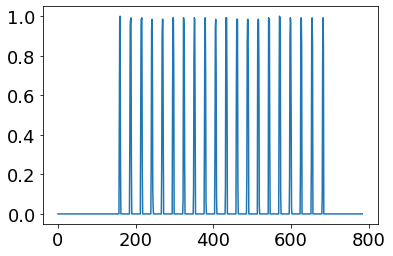

In [0]:
plt.plot(x_train[3])


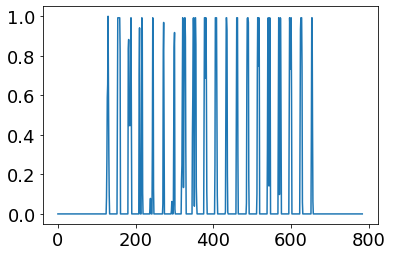

In [0]:
plt.plot(x_train[4139])

## Let's start with a simple NN: fully connected NN 

fully connected quiere decir que todas las neuronas de una capa conectan con todas las neuronas de la siguiente capa, aunque luego esa informacion no se transmita porque el peso es 0

### Build the NN

In [0]:
# Sequential means you can build a DNN layer by layer
fcmodel = Sequential() #fcmodel es como le llamo a la red neuronal y es de tipo sequential
# Dense has as arguments: 
#  number of neurons, type of activation function, and the input needs to match the output of the previous layer
#  input_shape=(N_features,) where N_features = 28*28
fcmodel.add(Dense(32, activation='relu', input_shape=(784,))) #construyo fcmodel poniendo tres capas. Capa 1
# we add a second layer
fcmodel.add(Dense(32, activation='relu')) #capa 2
# could include dropout, regularisation, ...
fcmodel.add(Dense(num_classes, activation='softmax')) #capa 3. Num classes es 10, el numero de clases que quieres tener.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
fcmodel.summary() #resumen de la red neuronal

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


Next, we choose the loss function according to which we will train the DNN 

For classification problems, this is usually the cross-entropy, and since the output data was cast in categorical
form, we choose the categorical_crossentropy defined in Keras’ losses module 

To optimize the weights of the net, we use SGD (Stochastic Gradient Descent) or other typical choices are RMSprop or Adam

The parameters for the optimizer, such as lr (learning rate) or momentum are passed using the corresponding optional arguments of the SGD() function

In [0]:
fcmodel.compile(loss='categorical_crossentropy', #funcion sobre como clasificar cosas???
                optimizer=RMSprop(), #lo optimizas en funcion del error cuadratico medio
                metrics=['accuracy']) #te devuelte la precision

### Train the NN

The **batch size** defines the number of samples that will be propagated through the network.

We have 60000 training samples and we set up a batch_size equal to 32. The algorithm takes the first 32 samples from the training dataset and trains the network. Next, it takes the second batch and trains the network again, and keep with this procedure until we have propagated all samples through of the network. 

**Training epochs** defines the number times that the learning algorithm will work through the entire training dataset.


In [0]:
batch_size = 32 #a la red neuronal solo le metes la 32ava parte de vuestros datos cada vez
epochs = 50 #el numero de veces que pasas TODOS los datos (50 veces cada 32ava parte)

In [0]:
# training the NN
history = fcmodel.fit(x_train, y_train,
                      batch_size=batch_size,
                      epochs=epochs,
                      verbose=1,
                      validation_data=(x_test, y_test))

Train on 60000 samples, validate on 5000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3436 - acc: 0.9008 - val_loss: 0.2024 - val_acc: 0.9418
Epoch 2/50
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1873 - acc: 0.9457 - val_loss: 0.1492 - val_acc: 0.9546
Epoch 3/50
60000/60000 [==============================] - 3s 48us/sample - loss: 0.1512 - acc: 0.9555 - val_loss: 0.1292 - val_acc: 0.9618
Epoch 4/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1290 - acc: 0.9628 - val_loss: 0.1262 - val_acc: 0.9662
Epoch 5/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1160 - acc: 0.9661 - val_loss: 0.1109 - val_acc: 0.9682
Epoch 6/50
60000/60000 [==============================] - 3s 49us/sample - loss: 0.1056 - acc: 0.9698 - val_loss: 0.1182 - val_acc: 0.9674
Epoch 7/50
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0974 - acc: 0.9725 - val_loss: 0.1

In [0]:
score = fcmodel.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]) #precision de los datos

Test loss: 0.283901834397245
Test accuracy: 0.9664


In [0]:
# in principle, we should not look at the score for this set of data
# until we have finished tuning our model
score = fcmodel.evaluate(x_val, y_val, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3629212053950061
Test accuracy: 0.9624


In [0]:
def histplot(history):
    hist = pd.DataFrame(history.history)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    hist.plot(y=['loss', 'val_loss'], ax=ax1)
    min_loss = hist['val_loss'].min()
    ax1.hlines(min_loss, 0, len(hist), linestyle='dotted',
               label='min(val_loss) = {:.3f}'.format(min_loss))
    ax1.legend(loc='upper right')
    hist.plot(y=['acc', 'val_acc'], ax=ax2)
    max_acc = hist['val_acc'].max()
    ax2.hlines(max_acc, 0, len(hist), linestyle='dotted',
               label='max(val_acc) = {:.3f}'.format(max_acc))
    ax2.legend(loc='lower right', fontsize='large')

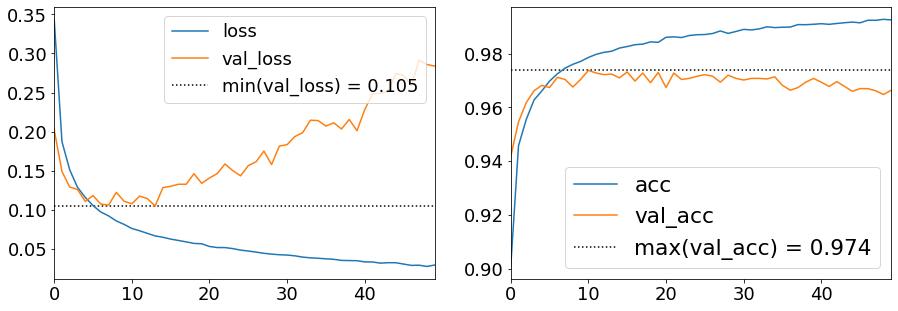

In [0]:
histplot(history)

## Now let's use a Convolutional Neural Network (CNN)

### We need to reshape the data  

In [0]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [0]:
x_train.shape

(60000, 28, 28, 1)

###  Construct the network

In [0]:
# a fairly small network for speed
cnnmodel = Sequential()
cnnmodel.add(Conv2D(8, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnnmodel.add(MaxPooling2D((3, 3)))
cnnmodel.add(Conv2D(16, (3, 3), activation='relu'))
cnnmodel.add(MaxPooling2D((2, 2)))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(num_classes, activation='softmax'))
# could include dropout, regularisation, ...

In [0]:
cnnmodel.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(),
                metrics=['accuracy'])

In [0]:
cnnmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 16)          1168      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1450      
Total params: 2,698
Trainable params: 2,698
Non-trainable params: 0
____________________________________________________

In [0]:
# save weights for reinitialising below
cnnmodel.save_weights('/tmp/cnnmodel_init_weights.tf')

### Train the CNN

In [0]:
history = cnnmodel.fit(x_train, y_train,
                       batch_size=batch_size, 
                       epochs=3*epochs,
                       verbose=1,
                       validation_data=(x_test, y_test))

Train on 60000 samples, validate on 5000 samples
Epoch 1/150
60000/60000 [==============================] - 19s 320us/sample - loss: 0.3828 - acc: 0.8879 - val_loss: 0.1333 - val_acc: 0.9578
Epoch 2/150
60000/60000 [==============================] - 19s 316us/sample - loss: 0.1357 - acc: 0.9580 - val_loss: 0.0891 - val_acc: 0.9732
Epoch 3/150
60000/60000 [==============================] - 19s 314us/sample - loss: 0.1057 - acc: 0.9676 - val_loss: 0.0783 - val_acc: 0.9764
Epoch 4/150
60000/60000 [==============================] - 19s 314us/sample - loss: 0.0899 - acc: 0.9719 - val_loss: 0.0613 - val_acc: 0.9810
Epoch 5/150
60000/60000 [==============================] - 19s 321us/sample - loss: 0.0800 - acc: 0.9756 - val_loss: 0.0695 - val_acc: 0.9784
Epoch 6/150
60000/60000 [==============================] - 19s 313us/sample - loss: 0.0725 - acc: 0.9775 - val_loss: 0.0574 - val_acc: 0.9838
Epoch 7/150
60000/60000 [==============================] - 19s 315us/sample - loss: 0.0674 - acc: 0

In [0]:
histplot(history)

## Data augmentation

Data augmentation is a technique to artificially create new training data from existing training data by rotating, obscuring or other transformations in the original data. 

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    shear_range=20.0,
    zoom_range=0.05)

#datagen.fit(x_train)  # only required if normalizing

In [0]:
gen = datagen.flow(x_train, y_train, batch_size=1)

In [0]:
# run this several times to see more augmented examples
i = 3
fig, axarr = plt.subplots(1, 5)
for ax in axarr:
    img = gen[i][0][0, : , :, 0]
    ax.imshow(img, cmap='gray');
    ax.axis('off')
print('label =', gen[i][1][0].argmax())

In [0]:
# Reinitialise model
cnnmodel.load_weights('/tmp/cnnmodel_init_weights.tf')

In [0]:
cnnmodel.compile(loss='categorical_crossentropy',
                 optimizer=RMSprop(),
                 metrics=['accuracy'])

In [0]:
# fits the model on batches with real-time data augmentation:
# the accuracy continues to (slowly) rise, due to the augmentation
history = cnnmodel.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size), 
                                 epochs=10*epochs,
                                 verbose=1,
                                 validation_data=(x_test, y_test))

In [0]:
histplot(history)


## THINGS to play with

1.   Change the NN architecture
2.   Change the training epochs
3.   Change the train/test splitting





